In [1]:
# Importation des bibliothèques qui vont être utilisées

import pandas as pd
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

import category_encoders as ce

In [ ]:
#!pip install category_encoders

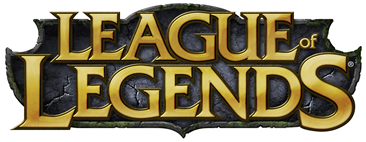

# Analyse des matchs professionnels d'E-Sport de League Of Legend et prédiction

## But du jeu
Dans League of Legends, le joueur contrôle un champion aux compétences uniques dont la puissance augmente au fil de la partie se battant contre une équipe de joueurs en temps réel la plupart du temps. L'objectif d'une partie est, dans la quasi-totalité des modes de jeu, de détruire le « Nexus » ennemi, bâtiment situé au cœur de la base adverse protégé par des tourelles et inhibiteurs. A l'échelle professionnelle, une confrontation se fait en 1,3 ou 5 matchs.

Ci-dessous, la carte aussi apprlée "faille de l'invocateur" sur laquelle joue les deux équipes. 

    On retrouve 2 côtés, côté bleu (blue side) et côté rouge (red side).
    On a aussi 3 voies :
        - Voie du nord (Top) en haut à gauche
        - Voie du milieu (Mid) 
        - Voie du bas (Bot) en bas à droite
        
   Chaque équipe a sa partie de la jungle, les deux jungles sont séparées par une rivière. Les deux jungles comportent des monstres identiques de chaque coté, leur emplacement est symétreique par rapport à la voie du milieu.
  
  Dans la rivière on retrouve 2 puits contenant des monstres légendaires, en haut l'hérald remplacé par le baron à 20mn de jeu et en bas le dragon. Ces monstres offrent de gros bonus temporaires ou permanents à ceux qui le tue.
  
  On dénombre 5 postes dans League Of Legends :
  
      - Top : joueur allant sur la voie du haut, il peut avoir plusieur rôle :
              - Tank : le joueur a pris un personnage avec de forte capacité défensive, son rôle sera alors de prendre des dégats pour ses équipiers
              - Bruiser : le joueur a pris un personnage avec des aptitudes orientées vers le 1 contre 1 voir du 2 contre 1, dans ce cas son objectif sera d'aller détruire les tourelles adversaires le temps que ses coéquipiers occupent les adversaires
              
      - Jungle : joueur évoluant principalement dans la jungle, il doit assurer la prise des objectif neutre (Monstre dans la rivière), apportéde la vision à son équipe ainsi qu'apporter le surnombre sur une voie. Les champions joués à ce poste sont généralement ceux ayant une bonne mobilité (ceux qui se déplacent vite)
      
      - Mid : joueur évoluant sur la voie du milieu, il a généralement deux rôles :
              - Mage : Prendre un personnage infligeant des dégats de type "magique" capable d'en faire beaucoup
              - Assassin : Prendre un personnage infligeant d'énormes dégats en un court instant pour se débarasser du ou des adversaires faisant le plus de dégats
              
      - ADC : joueur évoluant sur la voie du bas, nommé Attack Damage Carry, il s'agit de personnage dont les attaques s'effectuent à distance pour être en sécurité durant les combats et infligent de lourds dégats physiques
      
      - Support : Joueur évoluant sur la voie du bas dont le rôle est de protéger l'ADC et d'assurer la vision. C'est généralement celui qui réfléchit à la stratégie de l'équipe.
      
              Ces rôles peuvent être joués de manières différentes.
   

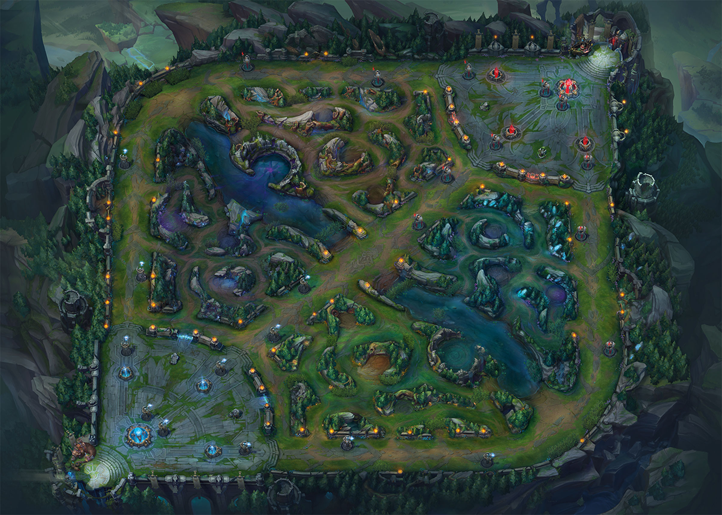

### Importation des données 

In [216]:
df = pd.read_csv("E:/LolAnalysis/2020_LoL_esports_match_data_from_OraclesElixir_20201221.csv")

### Echantillon des données
    Les données comportent les matchs de l'année 2020 dans 8 pays ou ensemble de pays qui représente des ligues: 
           - LPL :  League of Legends Pro League est le plus haut niveau de League of Legends professionnel en Chine
           - LEC : championnat européen de League of Legends
           - LCS.A : championnat nord américain de League of Legends
           - CBLOL : Campeonato Brasileiro de League of Legends est le plus haut niveau de la compétition professionnelle de League of Legends au Brésil
           - LCS : ancien championnat européen de League of Legends
           - TCL : Turkish Championship League
           - LCK : League of Legends Champions Korea
           - PCS : Pacific Championship Series est une ligue d'esports professionnelle pour les joueurs de League of Legends en compétition à Taiwan, Hong Kong, Macao et en Asie du Sud-Est
        
    

In [217]:
df.head()

,gameid,datacompleteness,url,league,year,split,playoffs,date,game,patch,...,csdiffat10,goldat15,xpat15,csat15,opp_goldat15,opp_xpat15,opp_csat15,golddiffat15,xpdiffat15,csdiffat15
0,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,23.0,4888.0,7368.0,131.0,4723.0,7202.0,118.0,165.0,166.0,13.0
1,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,-10.0,4385.0,4817.0,91.0,4784.0,4667.0,98.0,-399.0,150.0,-7.0
2,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,-9.0,4809.0,6275.0,129.0,5218.0,8112.0,140.0,-409.0,-1837.0,-11.0
3,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,3.0,4915.0,4959.0,136.0,4864.0,5360.0,135.0,51.0,-401.0,1.0
4,ESPORTSTMNT03/1241318,complete,http://matchhistory.na.leagueoflegends.com/en/...,KeSPA,2020,NaN,0,2020-01-03 07:33:26,1,9.24,...,1.0,2956.0,3800.0,20.0,3189.0,3543.0,28.0,-233.0,257.0,-8.0


### Taille des données
`14 808 lignes pour 99 variables

In [218]:
df.shape

(77544, 105)

### Valeurs à prédire 
    - 1 correspond à une victoire
    - 0 correspond à une défaite

In [219]:
df['result'].unique()

array([1, 0], dtype=int64)

## Ligue présent  et séparation 

In [220]:
df['league'].unique()

array(['KeSPA', 'LPL', 'LFL', 'LEC', 'LCS.A', 'CBLOL', 'LCS', 'UL', 'OPL',
       'VCS', 'TCL', 'TRA', 'BRCC', 'UKLC', 'LCK', 'CK', 'LJL', 'LLA',
       'LCL', 'PCS', 'EM', 'LDL', 'OCS', 'Riot', 'MSC', 'NLC', 'WCS',
       'NEST', 'NASG'], dtype=object)

In [221]:
kspa = df[df['league'] == 'KeSPA']

In [222]:
lpl = df[df['league'] == 'LPL']

### Nombre de valeurs manquantes dans l'ordre décroissant
    Les dragons de type indeterminé ont étaient remplacés ce qui explique autant d'absence
    Même chose pour les dragons des différents types
    Le reste des données manquantes sont des données non enregistrées

In [223]:
kspa.isna().sum().sort_values(ascending=False)

split                     120
dragons (type unknown)    120
opp_heralds               100
dragons                   100
firstdragon               100
                         ... 
totalgold                   0
earnedgold                  0
earned gpm                  0
goldspent                   0
gameid                      0
Length: 105, dtype: int64

### Corrélation entre le résultat et les autres colonnes 
    On remarque que les valeurs les plus importantes sont les nombres de tours détruites ainsi que la quantité d'or dépensé
    

In [224]:
lpl.corr().sort_values('result')['result'].drop(index='result')

opp_towers       -0.880799
opp_inhibitors   -0.737807
teamdeaths       -0.701523
opp_barons       -0.596983
opp_dragons      -0.573902
                    ...   
team kpm          0.712488
inhibitors        0.737807
gspd              0.750740
towers            0.880799
year                   NaN
Name: result, Length: 88, dtype: float64

<AxesSubplot:title={'center':"Corrélation entre 'result' et les variables les plus importantes"}>

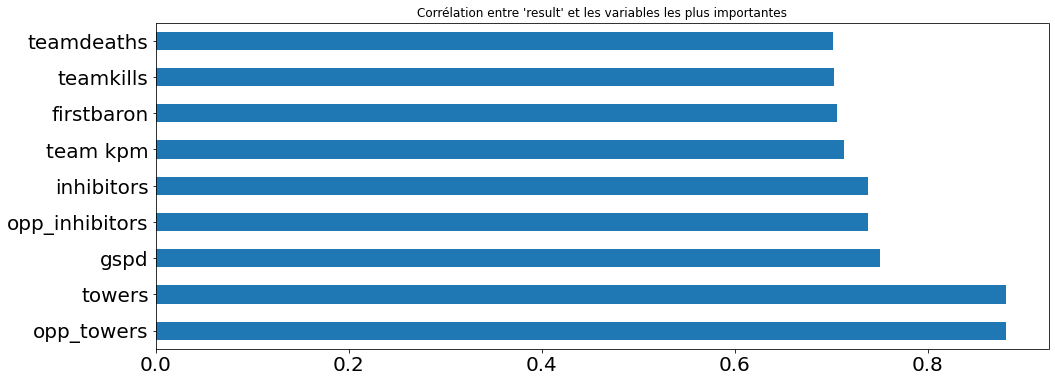

In [225]:
lpl.corr().abs().sort_values('result',ascending=False)['result'].head(10).drop(index='result').plot(kind='barh',title="Corrélation entre 'result' et les variables les plus importantes",figsize=[16,6],fontsize=20)

### Ci-dessous on retrouve la liste des colonnes 

In [226]:
df.columns

Index(['gameid', 'datacompleteness', 'url', 'league', 'year', 'split',
       'playoffs', 'date', 'game', 'patch',
       ...
       'csdiffat10', 'goldat15', 'xpat15', 'csat15', 'opp_goldat15',
       'opp_xpat15', 'opp_csat15', 'golddiffat15', 'xpdiffat15', 'csdiffat15'],
      dtype='object', length=105)

### Explication des différentes colonnes
        #### Ci-dessous la désignation de chaque colonne

gameid : identifiant du match

url : lien des statistiques du match

league : compétition correspondant au match

date 

game : numéro de la manche (Un affrontement peut se décider en 1,3 ou 5 manches)

patch : version du jeu

playerid : identifiant du joueur

side : coté de la map ou joue l'equipe

position : poste du joueur (top,jungle,mid, adc ou support)

player : pseudo du joueur

team : nom de l'equipe

champion : personnage choisi par le joueur

ban1,2,3,4,5 : champions bannis lors de la phase de séléction de champion

gamelength : durée de la manche en secondes

result : résultat du match (variable à prédire)

kills,deaths, assists : nombre de champions tués, de morts et d'assistance dans une élimination

teamkills, teamdeaths : nombre d'éliminations de l'équipe et nombre de morts

doublekills,triplekills,quadrakills,pentakills : 2,3,4,5 éliminations en un court délai par un même champion

firstblood : équipe faisant la première élimination de la partie

firstbloodkill : joueur faisant la première élimination de la partie

firstbloodassist : assistance durant la première élimination

firstbloodvictim : victime de la première élimination

team kpm : nombre d'éliminations par minute de l'équipe 

ckpm : nombre d'éliminations par minute des deux équipe réunies

firstdragon : première équipe à avoir éliminé un dragon

dragons : nombre de dragons éliminés

opp_dragons : nombre de dragons de l'équipe adverse

infernals,mountains,clouds,oceans : nombre de dragons de type infernal,montagne,nuage,océan de l'équipe

dragons (type unknown) : nombre de dragons de type inconnu de l'équipe (les dragons n'avais pas de type dans les anciiennes versions du jeu)

elders : nombre de dragons de type elders de l'équipe

opp_elders : nombre de dragon de type elders de l'adversaire

heralds : nombre de hérald tuer (grand monstre)

opp_heralds : nombre de hérald tuer par l'adversaire (grand monstre)

firstbaron : équipe ayant tué le premier baron

barons : nombre de barons tué par l'équipe

opp_barons : nombre de barons tué par l'adversaire

firsttower : première équipe à avoir détruit une tour

towers : nombre de tours détruites par l'équipe

opp_towers : nombre de tours détruites par l'adversaire

firstmidtower : première équipe à détruire la tour du milieu adverse

firsttothreetowers : première équipe à détruire trois tours

inhibitors : nombre d'inhibiteurs détruits

opp_inhibitors : nombre d'inhibiteurs détruits par l'adveraire

damagetochampions : dégats infligés aux champions ennemis

dpm : dégats par minute

damageshare : part de dégats par rapport au total de l'équipe

wardsplaced : nombre de wards placées (ward: objet placé donnant la vision dans un lieu)

wpm : wards placées par minute

wardskilled : nombre de wards ennemies détruites

wcpm : nombre de wards ennemies détruites par minute

controlwardbought : nombre de wards achetées

visionscore : score de vision (en fonction du nombre de wards placées et détruites)

vspm : score de vision par minute

totalgold : nombre total d'or gagné

earnedgold : nombre total d'or gagné sans compter l'or distribué au début et celui offert continuellement au cours de la partie

earned gpm : nombre total d'or gagné sans compter l'or distribué au début et celui offert continuellement au cours de la partie par minute

earnedgoldshare : part d'or gagné sans compter l'or distribué au début et celui offert continuellement au cours de la partie par minute

goldspent : or dépensé à la boutique

gspd : différence d'or dépensé en pourcentage

total cs : nombre de minions+monstres tués

minionkills: nombre de minions tués

monsterkills : nombre de monstres tués

monsterownjunglekills : nombre de monstres tués dans sa propre jungle

monsterkillsenemyjungle : nombre de monstres tués dans la jungle ennemis

cspm : nombre de minions+monstres tués par minute

goldat10,goldat15 : nombre d'or à 10mn/15mn de jeu

xpat10/xpat15 : expérience à 10/15mn de jeu

csat10/csat15 : nombre de minions+monstres tués à 10/15mn de jeu

xpdiffat10/xpdiffat15 : différence d'expérience à 10/15mn de jeu

opp_goldat10,opp_goldat15 : nombre d'or à 10mn/15mn de jeu

opp_xpat10/opp_xpat15 : expérience à 10/15mn de jeu

opp_csat10/opp_csat15 : nombre de minions+monstres tués à 10/15mn de jeu

opp_xpdiffat10/opp_xpdiffat15 : différence d'expérience à 10/15mn de jeu


### Voici la liste des champions avec le plus grand nombre de victoire

<AxesSubplot:title={'center':'Liste des 10 champions ayant le plus grand nombre de victoire'}, ylabel='champion'>

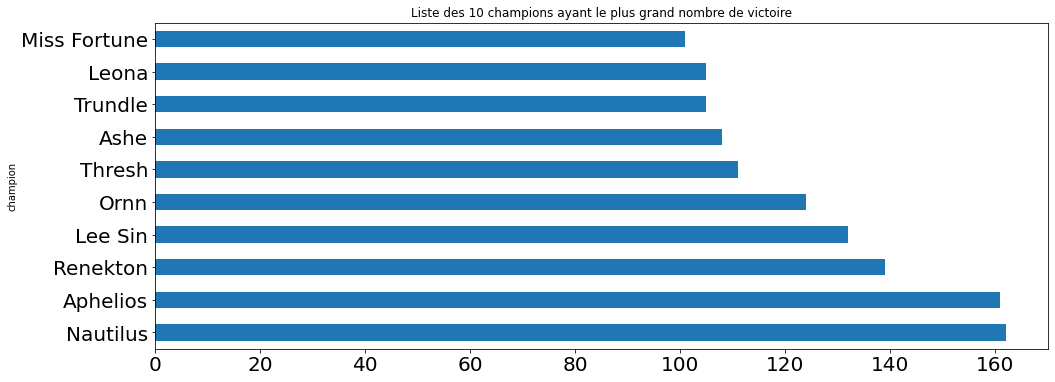

In [227]:
lpl.groupby('champion')['result'].sum().sort_values(ascending = False).head(10).plot(kind='barh',figsize=[16,6],title='Liste des 10 champions ayant le plus grand nombre de victoire',fontsize=20)

### Voici la liste des joueurs avec le plus grand nombre de victoire
     Il faut savoir que le changement de joueur pendant une saison est très rare, Faker, Teddy et Effort jouent dans la même équipe.

<AxesSubplot:title={'center':'Liste des 10 joueurs ayant le plus grand nombre de victoire'}, ylabel='player'>

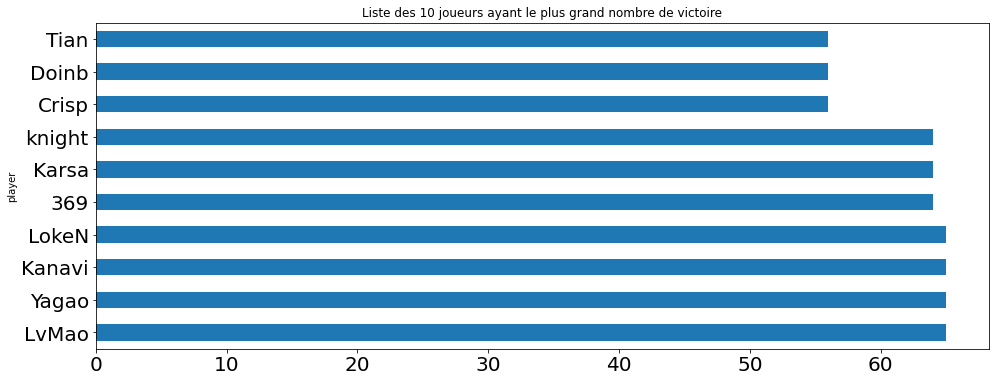

In [228]:
lpl.groupby('player')['result'].sum().sort_values(ascending = False).head(10).plot(kind='barh',figsize=[16,6],title='Liste des 10 joueurs ayant le plus grand nombre de victoire',fontsize=20)

### Voici la liste des équipes avec le plus grand nombre de victoire

<AxesSubplot:title={'center':'Liste des 10 équipes ayant le plus grand nombre de victoire'}, ylabel='team'>

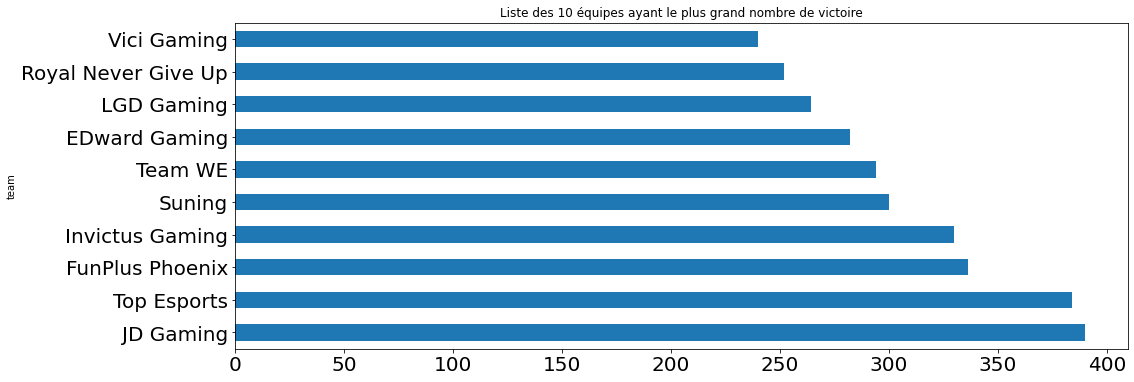

In [229]:
lpl.groupby('team')['result'].sum().sort_values(ascending = False).head(10).plot(kind='barh',figsize=[16,6],title='Liste des 10 équipes ayant le plus grand nombre de victoire',fontsize=20)

In [230]:
lpl['gameid'].unique()

array(['5655-7249', '5655-7250', '5656-7252', '5655-7251', '5656-7253',
       '5656-7254', '5657-7255', '5657-7256', '5658-7257', '5658-7258',
       '5659-7259', '5659-7260', '5659-7261', '5660-7262', '5660-7263',
       '5661-7265', '5661-7266', '5662-7264', '5662-7267', '5663-7268',
       '5663-7269', '5663-7270', '5664-7277', '5664-7271', '5665-7276',
       '5665-7272', '5666-7273', '5666-7274', '5666-7275', '5667-7278',
       '5667-7279', '5667-7280', '5668-7281', '5668-7282', '5668-7283',
       '5952-7303', '5952-7304', '5952-7305', '5953-7306', '5953-7307',
       '5953-7308', '5954-7309', '5954-7310', '5955-7311', '5955-7312',
       '5956-7313', '5956-7314', '5956-7315', '5957-7316', '5957-7317',
       '5957-7318', '5958-7319', '5958-7320', '5959-7321', '5959-7322',
       '5960-7323', '5960-7324', '5961-7325', '5961-7326', '5961-7327',
       '5962-7328', '5962-7329', '5963-7330', '5963-7331', '5964-7332',
       '5964-7333', '5965-7334', '5965-7335', '5966-7336', '5966

### Premier jeu de données :
    Données disponibles avant la partie : 
        - gameid
        - league
        - game
        - playerid
        - side
        - position
        - team
        - champion
        - ban1,2,3,4,5
        - result
    

In [231]:
dataset1 = lpl[['game','playerid','side','position','team','result']]

In [232]:
dataset1.head()

,game,playerid,side,position,team,result
120,1,1,Blue,top,Invictus Gaming,1
121,1,2,Blue,jng,Invictus Gaming,1
122,1,3,Blue,mid,Invictus Gaming,1
123,1,4,Blue,bot,Invictus Gaming,1
124,1,5,Blue,sup,Invictus Gaming,1


In [233]:
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8712 entries, 120 to 69887
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   game      8712 non-null   int64 
 1   playerid  8712 non-null   int64 
 2   side      8712 non-null   object
 3   position  8712 non-null   object
 4   team      8712 non-null   object
 5   result    8712 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 476.4+ KB


### Nombre de valeurs manquantes pour chaque colonne
        

In [234]:
dataset1.isna().sum()

game        0
playerid    0
side        0
position    0
team        0
result      0
dtype: int64

### Suppression des valeurs manquantes

In [235]:
dataset1 = dataset1.dropna()

In [236]:
dataset1.head()

,game,playerid,side,position,team,result
120,1,1,Blue,top,Invictus Gaming,1
121,1,2,Blue,jng,Invictus Gaming,1
122,1,3,Blue,mid,Invictus Gaming,1
123,1,4,Blue,bot,Invictus Gaming,1
124,1,5,Blue,sup,Invictus Gaming,1


### Fonction qui va servir à transformer les valeurs catégorielles

In [237]:
def transform(name):
    tmp = name.astype('category')
    tmp = pd.Categorical(tmp).codes
    return tmp


### Traitement des variables catégorielles

In [238]:
dataset1['side'] = transform(dataset1['side'])
dataset1['position'] = transform(dataset1['position'])
dataset1['team'] = transform(dataset1['team'])

In [239]:
dataset1.head()

,game,playerid,side,position,team,result
120,1,1,0,5,4,1
121,1,2,0,1,4,1
122,1,3,0,2,4,1
123,1,4,0,0,4,1
124,1,5,0,3,4,1


### Corrélation entre les variables et le résultat

In [240]:
dataset1.corr().sort_values('result')['result'].drop(index='result')

side       -6.060606e-02
playerid   -1.095070e-02
team       -8.082286e-03
game       -2.162876e-18
position    0.000000e+00
Name: result, dtype: float64

### On remarque que la valeur la plus importante est "side" 

<AxesSubplot:title={'center':"Corrélation entre 'result' et les autres colonnes"}>

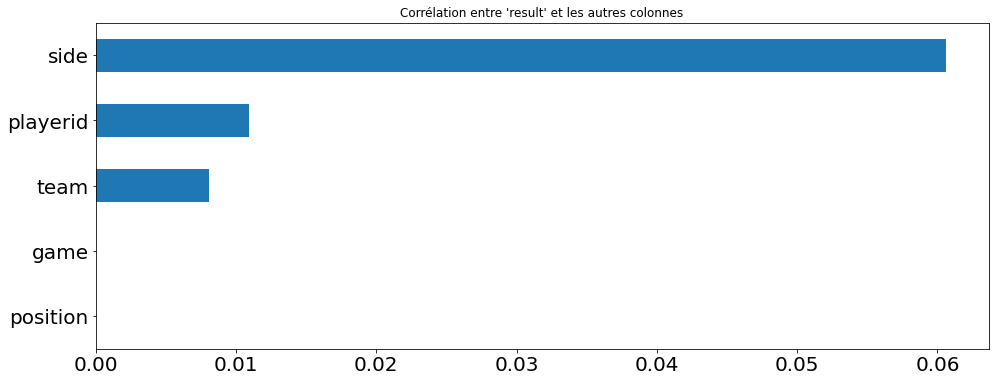

In [241]:
dataset1.corr().abs().sort_values('result')['result'].drop(index='result').tail(15).plot(kind='barh',title="Corrélation entre 'result' et les autres colonnes",figsize=[16,6],fontsize=20)

### Traitement des données pour les algorithmes de classification

In [242]:
array = dataset1.values

In [243]:
X = array[:,0:5]
Y = array[:,5]

In [244]:
Y

array([1, 1, 1, ..., 1, 0, 1], dtype=int64)

### Séparation des données pour l'apprentissage et le test
    On précise ici le fait de ne pas mélanger les données car pour un match donné on retrouve 10 fois le même gameid, un même gameid se retrouve dans le train et dans le test, il suffira de vérifier cette valeur pour obtenir le résultat, ce qui va fausser la prédiction

In [245]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)

# SVM


In [246]:
model_svm = SVC(probability = True)
model_svm.fit(X_train,Y_train)
Y_pred_svm = model_svm.predict(X_test)

In [247]:
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(Y_test, Y_pred_svm).ravel()

In [248]:
print("True negative : %d" % tn_svm)
print("False positive : %d" % fp_svm)
print("False negative : %d" % fn_svm)
print("True positive : %d" % tp_svm)

True negative : 452
False positive : 420
False negative : 420
True positive : 451


In [249]:
print("Accuracy : %f" % ((tn_svm+tp_svm)/(tn_svm+fp_svm+fn_svm+tp_svm)))

Accuracy : 0.518072


In [250]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_svm, average='binary'))

F1 score : 0.517796


# Logistic Regression

In [251]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train,Y_train)
Y_pred_LR = model_LogisticRegression.predict(X_test)

In [252]:
tn_LR, fp_LR, fn_LR, tp_LR = confusion_matrix(Y_test, Y_pred_LR).ravel()

In [253]:
print("True negative : %d" % tn_LR)
print("False positive : %d" % fp_LR)
print("False negative : %d" % fn_LR)
print("True positive : %d" % tp_LR)

True negative : 452
False positive : 420
False negative : 420
True positive : 451


In [254]:
print("Accuracy : %f" % ((tn_LR+tp_LR)/(tn_LR+fp_LR+fn_LR+tp_LR)))

Accuracy : 0.518072


In [255]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_LR, average='binary'))

F1 score : 0.517796


# Decision Tree Classifier

In [256]:
model_DecisionTreeClassifier = DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X_train,Y_train)
Y_pred_DTC = model_DecisionTreeClassifier.predict(X_test)

In [257]:
model_DecisionTreeClassifier.feature_importances_

array([ 3.03043949e-01,  3.60490731e-04,  1.28462055e-01, -7.68180965e-17,
        5.68133505e-01])

In [258]:
tn_DTC, fp_DTC, fn_DTC, tp_DTC = confusion_matrix(Y_test, Y_pred_DTC).ravel()

In [259]:
print("True negative : %d" % tn_DTC)
print("False positive : %d" % fp_DTC)
print("False negative : %d" % fn_DTC)
print("True positive : %d" % tp_DTC)

True negative : 474
False positive : 398
False negative : 372
True positive : 499


In [260]:
print("Accuracy : %f" % ((tn_DTC+tp_DTC)/(tn_DTC+fp_DTC+fn_DTC+tp_DTC)))

Accuracy : 0.558233


In [261]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_DTC, average='binary'))

F1 score : 0.564480


# KNeighbors Classifier


In [262]:
model_KNeighborsClassifier = KNeighborsClassifier()
model_KNeighborsClassifier.fit(X_train,Y_train)
Y_pred_KNC = model_KNeighborsClassifier.predict(X_test)

In [263]:
tn_KNC, fp_KNC, fn_KNC, tp_KNC = confusion_matrix(Y_test, Y_pred_KNC).ravel()

In [264]:
print("True negative : %d" % tn_KNC)
print("False positive : %d" % fp_KNC)
print("False negative : %d" % fn_KNC)
print("True positive : %d" % tp_KNC)

True negative : 456
False positive : 416
False negative : 371
True positive : 500


In [265]:
print("Accuracy : %f" % ((tn_KNC+tp_KNC)/(tn_KNC+fp_KNC+fn_KNC+tp_KNC)))

Accuracy : 0.548480


In [266]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_KNC, average='binary'))

F1 score : 0.559597


# Linear Discriminant Analysis

In [267]:
model_LinearDiscriminantAnalysis = LinearDiscriminantAnalysis()
model_LinearDiscriminantAnalysis.fit(X_train,Y_train)
Y_pred_LDA = model_LinearDiscriminantAnalysis.predict(X_test)

In [268]:
tn_LDA, fp_LDA, fn_LDA, tp_LDA = confusion_matrix(Y_test, Y_pred_LDA).ravel()

In [269]:
print("True negative : %d" % tn_LDA)
print("False positive : %d" % fp_LDA)
print("False negative : %d" % fn_LDA)
print("True positive : %d" % tp_LDA)

True negative : 452
False positive : 420
False negative : 420
True positive : 451


In [270]:
print("Accuracy : %f" % ((tn_LDA+tp_LDA)/(tn_LDA+fp_LDA+fn_LDA+tp_LDA)))

Accuracy : 0.518072


In [271]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_LDA, average='binary'))

F1 score : 0.517796


# Gaussian NB

In [272]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train,Y_train)
Y_pred_GNB = model_GaussianNB.predict(X_test)

In [273]:
tn_GNB, fp_GNB, fn_GNB, tp_GNB = confusion_matrix(Y_test, Y_pred_GNB).ravel()

In [274]:
print("True negative : %d" % tn_GNB)
print("False positive : %d" % fp_GNB)
print("False negative : %d" % fn_GNB)
print("True positive : %d" % tp_GNB)

True negative : 452
False positive : 420
False negative : 420
True positive : 451


In [275]:
print("Accuracy : %f" % ((tn_GNB+tp_GNB)/(tn_GNB+fp_GNB+fn_GNB+tp_GNB)))

Accuracy : 0.518072


In [276]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_GNB, average='binary'))

F1 score : 0.517796


### On en conclu que l'algorithme le plus performant est Decision Tree Classifier
        On va donc faire un gridsearch dessus 

# Optimisation de DTC avec gridsearch

In [212]:
params = {'max_leaf_nodes': list(range(2, 65)), 'min_samples_split': [2, 3, 4]}
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), params, verbose=1, cv=3)
grid_search_cv.fit(X_train, Y_train)

Fitting 3 folds for each of 189 candidates, totalling 567 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 567 out of 567 | elapsed:    0.9s finished


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             verbose=1)

In [213]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(max_leaf_nodes=9, random_state=42)

In [214]:
GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=65,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
             iid='warn', n_jobs=8,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62,63,64,65], 'min_samples_split': [2, 3, 4]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(max_leaf_nodes=65, presort=False,
                                              random_state=42),
             iid='warn', n_jobs=8,
             param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4]},
             return_train_score='warn', verbose=1)

In [215]:
pd.DataFrame(grid_search_cv.cv_results_)[['mean_test_score', 'std_test_score', 'params']].sort_values('mean_test_score',ascending=False).head()

,mean_test_score,std_test_score,params
21,0.640236,0.226784,"{'max_leaf_nodes': 9, 'min_samples_split': 2}"
30,0.640236,0.226784,"{'max_leaf_nodes': 12, 'min_samples_split': 2}"
22,0.640236,0.226784,"{'max_leaf_nodes': 9, 'min_samples_split': 3}"
31,0.640236,0.226784,"{'max_leaf_nodes': 12, 'min_samples_split': 3}"
23,0.640236,0.226784,"{'max_leaf_nodes': 9, 'min_samples_split': 4}"


### Deuxième jeu de données
    Inclus les informations disponibles à 10mn de jeu
    On rajoute alors gold,sp,golddiff,xpdiff,csdiff at10

In [86]:
dataset2 = lpl[['gameid','league','game','playerid','side','position','team','champion','ban1','ban2','ban3','ban4','ban5','goldat10','xpat10','csat10','golddiffat10','xpdiffat10','csdiffat10','result']]

In [87]:
dataset2.head()

,gameid,league,game,playerid,side,position,team,champion,ban1,ban2,ban3,ban4,ban5,goldat10,xpat10,csat10,golddiffat10,xpdiffat10,csdiffat10,result
36,6909-9183,LPL,1,1,Blue,top,Top Esports,Karma,Olaf,Renekton,Zoe,Twisted Fate,Orianna,3429.0,4942.0,89.0,133.0,-42.0,2.0,0
37,6909-9183,LPL,1,2,Blue,jng,Top Esports,Pantheon,Olaf,Renekton,Zoe,Twisted Fate,Orianna,3271.0,3982.0,71.0,-166.0,24.0,-6.0,0
38,6909-9183,LPL,1,3,Blue,mid,Top Esports,Syndra,Olaf,Renekton,Zoe,Twisted Fate,Orianna,3842.0,4901.0,100.0,518.0,74.0,9.0,0
39,6909-9183,LPL,1,4,Blue,bot,Top Esports,Samira,Olaf,Renekton,Zoe,Twisted Fate,Orianna,3446.0,3308.0,100.0,150.0,153.0,9.0,0
40,6909-9183,LPL,1,5,Blue,sup,Top Esports,Leona,Olaf,Renekton,Zoe,Twisted Fate,Orianna,2189.0,2507.0,20.0,97.0,-134.0,6.0,0


In [88]:
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168 entries, 36 to 203
Data columns (total 20 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   gameid        156 non-null    object 
 1   league        168 non-null    object 
 2   game          168 non-null    int64  
 3   playerid      168 non-null    int64  
 4   side          168 non-null    object 
 5   position      168 non-null    object 
 6   team          168 non-null    object 
 7   champion      140 non-null    object 
 8   ban1          168 non-null    object 
 9   ban2          168 non-null    object 
 10  ban3          168 non-null    object 
 11  ban4          168 non-null    object 
 12  ban5          168 non-null    object 
 13  goldat10      156 non-null    float64
 14  xpat10        156 non-null    float64
 15  csat10        156 non-null    float64
 16  golddiffat10  156 non-null    float64
 17  xpdiffat10    156 non-null    float64
 18  csdiffat10    156 non-null   

### On vérifie les valeurs manquantes puis on les supprime

In [89]:
dataset2.isna().sum()

gameid          12
league           0
game             0
playerid         0
side             0
position         0
team             0
champion        28
ban1             0
ban2             0
ban3             0
ban4             0
ban5             0
goldat10        12
xpat10          12
csat10          12
golddiffat10    12
xpdiffat10      12
csdiffat10      12
result           0
dtype: int64

In [90]:
dataset2 = dataset2.dropna()

In [91]:
dataset2['gameid'] = transform(dataset2['gameid'])
dataset2['league'] = transform(dataset2['league'])
dataset2['side'] = transform(dataset2['side'])
dataset2['position'] = transform(dataset2['position'])
dataset2['team'] = transform(dataset2['team'])
dataset2['champion'] = transform(dataset2['champion'])
dataset2['ban1'] = transform(dataset2['ban1'])
dataset2['ban2'] = transform(dataset2['ban2'])
dataset2['ban3'] = transform(dataset2['ban3'])
dataset2['ban4'] = transform(dataset2['ban4'])
dataset2['ban5'] = transform(dataset2['ban5'])

## Corrélation entre le résultat et les autres colonnes
    On remarque que les informations obtenues en jeu sont plus importantes que ceux que l'on avait au départ

In [92]:
dataset2.corr().sort_values('result')['result'].drop(index='result')

team           -9.559098e-02
ban5           -8.773648e-02
champion       -6.817556e-02
game           -1.156310e-17
gameid          0.000000e+00
position        0.000000e+00
csat10          2.485735e-02
goldat10        5.220155e-02
ban3            5.521913e-02
xpat10          5.658845e-02
golddiffat10    1.205229e-01
csdiffat10      1.257408e-01
ban1            1.837192e-01
xpdiffat10      2.370733e-01
ban2            2.701006e-01
playerid        2.901294e-01
side            3.333333e-01
ban4            3.692123e-01
league                   NaN
Name: result, dtype: float64

<AxesSubplot:title={'center':"Corrélation entre 'result' et les autres colonnes"}>

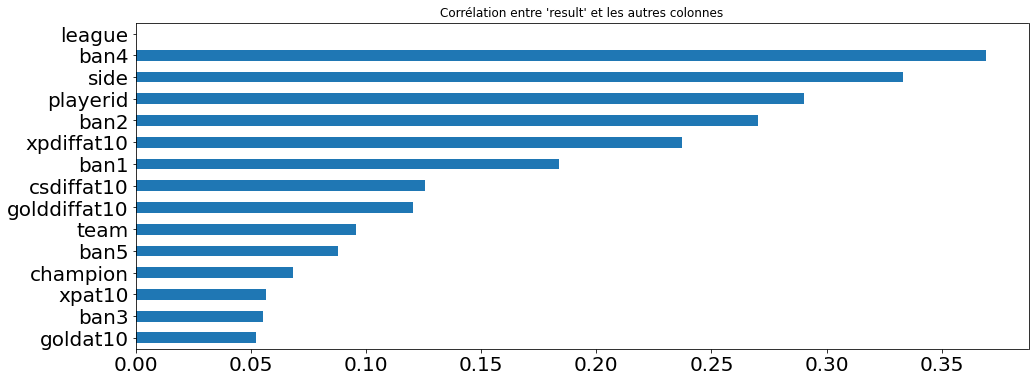

In [93]:
dataset2.corr().abs().sort_values('result')['result'].drop(index='result').tail(15).plot(kind='barh',title="Corrélation entre 'result' et les autres colonnes",figsize=[16,6],fontsize=20)

In [94]:
array = dataset2.values

In [95]:
X = array[:,0:19]
Y = array[:,19]

In [96]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)

# SVM


In [97]:
model_svm = SVC(probability = True)
model_svm.fit(X_train,Y_train)
Y_pred_svm = model_svm.predict(X_test)

In [98]:
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(Y_test, Y_pred_svm).ravel()

In [99]:
print("True negative : %d" % tn_svm)
print("False positive : %d" % fp_svm)
print("False negative : %d" % fn_svm)
print("True positive : %d" % tp_svm)

True negative : 0
False positive : 14
False negative : 0
True positive : 10


In [100]:
print("Accuracy : %f" % ((tn_svm+tp_svm)/(tn_svm+fp_svm+fn_svm+tp_svm)))

Accuracy : 0.416667


In [101]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_svm, average='binary'))

F1 score : 0.588235


# Logistic Regression


In [102]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train,Y_train)
Y_pred_LR = model_LogisticRegression.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [103]:
tn_LR, fp_LR, fn_LR, tp_LR = confusion_matrix(Y_test, Y_pred_LR).ravel()

In [104]:
print("True negative : %d" % tn_LR)
print("False positive : %d" % fp_LR)
print("False negative : %d" % fn_LR)
print("True positive : %d" % tp_LR)

True negative : 5
False positive : 9
False negative : 0
True positive : 10


In [105]:
print("Accuracy : %f" % ((tn_LR+tp_LR)/(tn_LR+fp_LR+fn_LR+tp_LR)))

Accuracy : 0.625000


In [106]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_LR, average='binary'))

F1 score : 0.689655


# Decision Tree Classifier


In [107]:
model_DecisionTreeClassifier = DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X_train,Y_train)
Y_pred_DTC = model_DecisionTreeClassifier.predict(X_test)

In [108]:
model_DecisionTreeClassifier.feature_importances_

array([0.14229249, 0.        , 0.        , 0.31304348, 0.        ,
       0.        , 0.27764388, 0.        , 0.        , 0.        ,
       0.03794466, 0.22907548, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        ])

In [109]:
tn_DTC, fp_DTC, fn_DTC, tp_DTC = confusion_matrix(Y_test, Y_pred_DTC).ravel()

In [110]:
print("True negative : %d" % tn_DTC)
print("False positive : %d" % fp_DTC)
print("False negative : %d" % fn_DTC)
print("True positive : %d" % tp_DTC)

True negative : 14
False positive : 0
False negative : 0
True positive : 10


In [111]:
print("Accuracy : %f" % ((tn_DTC+tp_DTC)/(tn_DTC+fp_DTC+fn_DTC+tp_DTC)))

Accuracy : 1.000000


In [112]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_DTC, average='binary'))

F1 score : 1.000000


# KNeighbors Classifier

In [113]:
model_KNeighborsClassifier = KNeighborsClassifier()
model_KNeighborsClassifier.fit(X_train,Y_train)
Y_pred_KNC = model_KNeighborsClassifier.predict(X_test)

In [114]:
tn_KNC, fp_KNC, fn_KNC, tp_KNC = confusion_matrix(Y_test, Y_pred_KNC).ravel()

In [115]:
print("True negative : %d" % tn_KNC)
print("False positive : %d" % fp_KNC)
print("False negative : %d" % fn_KNC)
print("True positive : %d" % tp_KNC)

True negative : 6
False positive : 8
False negative : 7
True positive : 3


In [116]:
print("Accuracy : %f" % ((tn_KNC+tp_KNC)/(tn_KNC+fp_KNC+fn_KNC+tp_KNC)))

Accuracy : 0.375000


In [117]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_KNC, average='binary'))

F1 score : 0.285714


# Linear Discriminant Analysis

In [118]:
model_LinearDiscriminantAnalysis = LinearDiscriminantAnalysis()
model_LinearDiscriminantAnalysis.fit(X_train,Y_train)
Y_pred_LDA = model_LinearDiscriminantAnalysis.predict(X_test)

In [119]:
tn_LDA, fp_LDA, fn_LDA, tp_LDA = confusion_matrix(Y_test, Y_pred_LDA).ravel()

In [120]:
print("True negative : %d" % tn_LDA)
print("False positive : %d" % fp_LDA)
print("False negative : %d" % fn_LDA)
print("True positive : %d" % tp_LDA)

True negative : 5
False positive : 9
False negative : 0
True positive : 10


In [121]:
print("Accuracy : %f" % ((tn_LDA+tp_LDA)/(tn_LDA+fp_LDA+fn_LDA+tp_LDA)))

Accuracy : 0.625000


In [122]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_LDA, average='binary'))

F1 score : 0.689655


# Gaussian NB


In [123]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train,Y_train)
Y_pred_GNB = model_GaussianNB.predict(X_test)

In [124]:
tn_GNB, fp_GNB, fn_GNB, tp_GNB = confusion_matrix(Y_test, Y_pred_GNB).ravel()

In [125]:
print("True negative : %d" % tn_GNB)
print("False positive : %d" % fp_GNB)
print("False negative : %d" % fn_GNB)
print("True positive : %d" % tp_GNB)

True negative : 5
False positive : 9
False negative : 0
True positive : 10


In [126]:
print("Accuracy : %f" % ((tn_GNB+tp_GNB)/(tn_GNB+fp_GNB+fn_GNB+tp_GNB)))

Accuracy : 0.625000


In [127]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_GNB, average='binary'))

F1 score : 0.689655


### L'algorithme le plus performant est donc le Linear Discriminant Analysis

# Troisième jeu de données 
    Inclus les informations disponibles à 15mn de jeu ainsi que les premiers élimination,dragon et tour.

In [190]:
dataset3 = df[['gameid','league','game','playerid','side','position','team','champion','ban1','ban2','ban3','ban4','ban5','goldat10','xpat10','csat10','golddiffat10','xpdiffat10','csdiffat10','goldat15','xpat15','csat15','golddiffat15','xpdiffat15','csdiffat15','firstblood','result']]

In [191]:
dataset3.head()

,gameid,league,game,playerid,side,position,team,champion,ban1,ban2,...,xpdiffat10,csdiffat10,goldat15,xpat15,csat15,golddiffat15,xpdiffat15,csdiffat15,firstblood,result
0,5655-7249,LPL,1,1,Blue,top,Invictus Gaming,Aatrox,Pantheon,Nautilus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,5655-7249,LPL,1,2,Blue,jng,Invictus Gaming,Qiyana,Pantheon,Nautilus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,5655-7249,LPL,1,3,Blue,mid,Invictus Gaming,Rumble,Pantheon,Nautilus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,5655-7249,LPL,1,4,Blue,bot,Invictus Gaming,Senna,Pantheon,Nautilus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,5655-7249,LPL,1,5,Blue,sup,Invictus Gaming,Braum,Pantheon,Nautilus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [192]:
dataset3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14808 entries, 0 to 14807
Data columns (total 27 columns):
gameid          14808 non-null object
league          14808 non-null object
game            14808 non-null int64
playerid        14808 non-null int64
side            14808 non-null object
position        14808 non-null object
team            14808 non-null object
champion        12340 non-null object
ban1            14556 non-null object
ban2            14556 non-null object
ban3            14556 non-null object
ban4            14550 non-null object
ban5            14484 non-null object
goldat10        10596 non-null float64
xpat10          10596 non-null float64
csat10          10596 non-null float64
golddiffat10    10596 non-null float64
xpdiffat10      10596 non-null float64
csdiffat10      10596 non-null float64
goldat15        10572 non-null float64
xpat15          10572 non-null float64
csat15          10572 non-null float64
golddiffat15    10572 non-null float64
xpdiffat1

### Vérification et suppression des valeurs manquantes

In [193]:
dataset3.isna().sum()

gameid             0
league             0
game               0
playerid           0
side               0
position           0
team               0
champion        2468
ban1             252
ban2             252
ban3             252
ban4             258
ban5             324
goldat10        4212
xpat10          4212
csat10          4212
golddiffat10    4212
xpdiffat10      4212
csdiffat10      4212
goldat15        4236
xpat15          4236
csat15          4236
golddiffat15    4236
xpdiffat15      4236
csdiffat15      4236
firstblood      3502
result             0
dtype: int64

In [196]:
dataset3 = dataset3.dropna()

In [224]:
dataset3['gameid'] = transform(dataset3['gameid'])
dataset3['league'] = transform(dataset3['league'])
dataset3['side'] = transform(dataset3['side'])
dataset3['position'] = transform(dataset3['position'])
dataset3['team'] = transform(dataset3['team'])
dataset3['champion'] = transform(dataset3['champion'])
dataset3['ban1'] = transform(dataset3['ban1'])
dataset3['ban2'] = transform(dataset3['ban2'])
dataset3['ban3'] = transform(dataset3['ban3'])
dataset3['ban4'] = transform(dataset3['ban4'])
dataset3['ban5'] = transform(dataset3['ban5'])

### Corrélation entre le résultat et les autres colonnes
    On remarque que les informations rajoutées sont encore plus importantes

In [225]:
dataset3.corr().sort_values('result')['result'].drop(index='result')

side           -0.081239
playerid       -0.070709
ban5           -0.036270
ban4           -0.000932
team           -0.000768
league         -0.000516
position        0.000000
gameid          0.001001
game            0.001169
champion        0.013847
ban2            0.017829
ban3            0.026107
csat10          0.027203
csat15          0.030179
ban1            0.036439
xpat10          0.051591
xpat15          0.068735
csdiffat10      0.085902
csdiffat15      0.100356
goldat10        0.115003
goldat15        0.153768
firstblood      0.158811
xpdiffat10      0.209206
golddiffat10    0.252167
xpdiffat15      0.265422
golddiffat15    0.319841
Name: result, dtype: float64

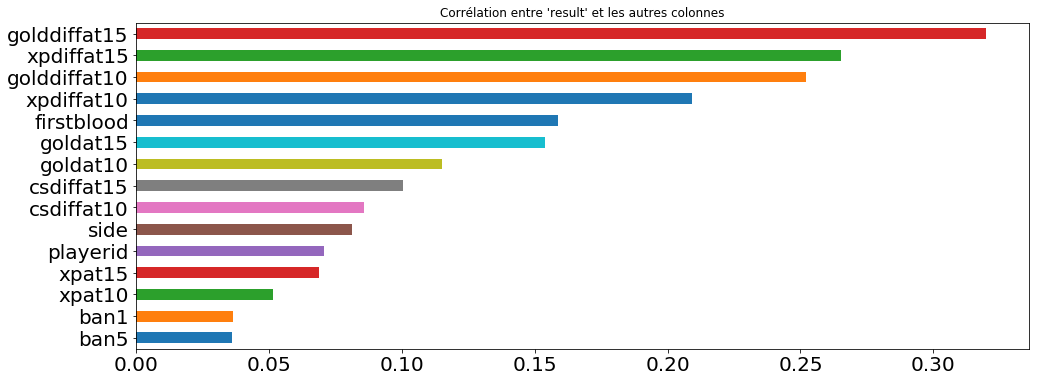

In [268]:
dataset3.corr().abs().sort_values('result')['result'].drop(index='result').tail(15).plot(kind='barh',title="Corrélation entre 'result' et les autres colonnes",figsize=[16,6],fontsize=20)

In [226]:
array = dataset3.values

In [227]:
X = array[:,0:26]
Y = array[:,26]

In [228]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2,shuffle=False)

# SVM


In [229]:
model_svm = SVC(probability = True)
model_svm.fit(X_train,Y_train)
Y_pred_svm = model_svm.predict(X_test)

In [230]:
tn_svm, fp_svm, fn_svm, tp_svm = confusion_matrix(Y_test, Y_pred_svm).ravel()

In [231]:
print("True negative : %d" % tn_svm)
print("False positive : %d" % fp_svm)
print("False negative : %d" % fn_svm)
print("True positive : %d" % tp_svm)


True negative : 533
False positive : 323
False negative : 309
True positive : 546


In [232]:
print("Accuracy : %f" % ((tn_svm+tp_svm)/(tn_svm+fp_svm+fn_svm+tp_svm)))

Accuracy : 0.630625


In [233]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_svm, average='binary'))

F1 score : 0.633411


# Logistic Regression

In [234]:
model_LogisticRegression = LogisticRegression()
model_LogisticRegression.fit(X_train,Y_train)
Y_pred_LR = model_LogisticRegression.predict(X_test)

E:\Ana\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [235]:
tn_LR, fp_LR, fn_LR, tp_LR = confusion_matrix(Y_test, Y_pred_LR).ravel()

In [236]:
print("True negative : %d" % tn_LR)
print("False positive : %d" % fp_LR)
print("False negative : %d" % fn_LR)
print("True positive : %d" % tp_LR)

True negative : 552
False positive : 304
False negative : 309
True positive : 546


In [237]:
print("Accuracy : %f" % ((tn_LR+tp_LR)/(tn_LR+fp_LR+fn_LR+tp_LR)))

Accuracy : 0.641730


In [238]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_LR, average='binary'))

F1 score : 0.640469


# Decision Tree Classifier

In [239]:
model_DecisionTreeClassifier = DecisionTreeClassifier()
model_DecisionTreeClassifier.fit(X_train,Y_train)
Y_pred_DTC = model_DecisionTreeClassifier.predict(X_test)

In [240]:
model_DecisionTreeClassifier.feature_importances_

array([0.06158777, 0.02078282, 0.00971567, 0.01489162, 0.00537452,
       0.00662542, 0.05070133, 0.0348225 , 0.03356947, 0.04293657,
       0.04209225, 0.04360466, 0.04632746, 0.03492024, 0.03370156,
       0.02802439, 0.04480963, 0.03585486, 0.02654518, 0.04530629,
       0.03517461, 0.03220589, 0.16547708, 0.05423793, 0.04552225,
       0.00518801])

In [241]:
tn_DTC, fp_DTC, fn_DTC, tp_DTC = confusion_matrix(Y_test, Y_pred_DTC).ravel()

In [242]:
print("True negative : %d" % tn_DTC)
print("False positive : %d" % fp_DTC)
print("False negative : %d" % fn_DTC)
print("True positive : %d" % tp_DTC)

True negative : 497
False positive : 359
False negative : 365
True positive : 490


In [243]:
print("Accuracy : %f" % ((tn_DTC+tp_DTC)/(tn_DTC+fp_DTC+fn_DTC+tp_DTC)))

Accuracy : 0.576856


In [244]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_DTC, average='binary'))

F1 score : 0.575117


# KNeighbors Classifier

In [245]:
model_KNeighborsClassifier = KNeighborsClassifier()
model_KNeighborsClassifier.fit(X_train,Y_train)
Y_pred_KNC = model_KNeighborsClassifier.predict(X_test)

In [246]:
tn_KNC, fp_KNC, fn_KNC, tp_KNC = confusion_matrix(Y_test, Y_pred_KNC).ravel()

In [247]:
print("True negative : %d" % tn_KNC)
print("False positive : %d" % fp_KNC)
print("False negative : %d" % fn_KNC)
print("True positive : %d" % tp_KNC)

True negative : 522
False positive : 334
False negative : 362
True positive : 493


In [248]:
print("Accuracy : %f" % ((tn_KNC+tp_KNC)/(tn_KNC+fp_KNC+fn_KNC+tp_KNC)))

Accuracy : 0.593220


In [249]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_KNC, average='binary'))

F1 score : 0.586207


# Linear Discriminant Analysis

In [250]:
model_LinearDiscriminantAnalysis = LinearDiscriminantAnalysis()
model_LinearDiscriminantAnalysis.fit(X_train,Y_train)
Y_pred_LDA = model_LinearDiscriminantAnalysis.predict(X_test)

In [251]:
tn_LDA, fp_LDA, fn_LDA, tp_LDA = confusion_matrix(Y_test, Y_pred_LDA).ravel()

In [252]:
print("True negative : %d" % tn_LDA)
print("False positive : %d" % fp_LDA)
print("False negative : %d" % fn_LDA)
print("True positive : %d" % tp_LDA)

True negative : 558
False positive : 298
False negative : 318
True positive : 537


In [253]:
print("Accuracy : %f" % ((tn_LDA+tp_LDA)/(tn_LDA+fp_LDA+fn_LDA+tp_LDA)))

Accuracy : 0.639977


In [254]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_LDA, average='binary'))

F1 score : 0.635503


# Gaussian NB

In [255]:
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train,Y_train)
Y_pred_GNB = model_GaussianNB.predict(X_test)

In [256]:
tn_GNB, fp_GNB, fn_GNB, tp_GNB = confusion_matrix(Y_test, Y_pred_GNB).ravel()

In [257]:
print("True negative : %d" % tn_GNB)
print("False positive : %d" % fp_GNB)
print("False negative : %d" % fn_GNB)
print("True positive : %d" % tp_GNB)

True negative : 539
False positive : 317
False negative : 350
True positive : 505


In [258]:
print("Accuracy : %f" % ((tn_GNB+tp_GNB)/(tn_GNB+fp_GNB+fn_GNB+tp_GNB)))

Accuracy : 0.610169


In [259]:
print("F1 score : %f" % f1_score(Y_test, Y_pred_GNB, average='binary'))

F1 score : 0.602266


### L'algorithme le plus performant reste le Linear Discriminant Analysis